<a href="https://colab.research.google.com/github/Bansalnitika21/Triloksir1/blob/main/mask_detectionBansalnitika21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/sample_data/

/content/sample_data


In [3]:
!ls

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [5]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


In [6]:
import os
os.makedirs("/root/.kaggle",exist_ok=True)
!cp kaggle.json /root/.kaggle

In [7]:
!kaggle datasets download -d mrviswamitrakaushik/facedatahybrid

 92% 217M/236M [00:02<00:00, 54.9MB/s]
100% 236M/236M [00:02<00:00, 90.7MB/s]


In [8]:
!unzip "*.zip"

Streaming output truncated to the last 5000 lines.
  inflating: my_face_train_data/face_data/train/with_mask/train_00020435.jpg  
  inflating: my_face_train_data/face_data/train/with_mask/train_00020436.jpg  
  inflating: my_face_train_data/face_data/train/with_mask/train_00020437.jpg  
  inflating: my_face_train_data/face_data/train/with_mask/train_00020438.jpg  
  inflating: my_face_train_data/face_data/train/with_mask/train_00020440.jpg  
  inflating: my_face_train_data/face_data/train/with_mask/train_00020441.jpg  
  inflating: my_face_train_data/face_data/train/with_mask/train_00020442.jpg  
  inflating: my_face_train_data/face_data/train/with_mask/train_00020443.jpg  
  inflating: my_face_train_data/face_data/train/with_mask/train_00020444.jpg  
  inflating: my_face_train_data/face_data/train/with_mask/train_00020445.jpg  
  inflating: my_face_train_data/face_data/train/with_mask/train_00020446.jpg  
  inflating: my_face_train_data/face_data/train/with_mask/train_00020447.jpg  
 

In [10]:
!ls 

anscombe.json		      kaggle.json	     my_face_train_data
california_housing_test.csv   mnist_test.csv	     README.md
california_housing_train.csv  mnist_train_small.csv
facedatahybrid.zip	      my_face_data


In [11]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate

In [13]:
%cd my_face_train_data

/content/sample_data/my_face_train_data


In [14]:
no_mask_images=os.listdir("face_data/train/no_mask")

In [15]:
len(no_mask_images)

22421

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
path="face_data"
tfms = get_transforms(do_flip=False)
#data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)
data = ImageDataBunch.from_folder( Path("/content/sample_data/my_face_train_data/face_data/train"), train='.', test='/content/sample_data/my_face_data/face_data/test', valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms())

In [22]:
doc(DataBunch)

In [24]:
print(data.classes)
len(data.classes)

['no_mask', 'with_mask']


2

In [25]:
doc(cnn_learner)

In [26]:
resnet_learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


1st


In [29]:
resnet_learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.102421,0.064479,0.025111,05:42


In [33]:
interp = ClassificationInterpretation.from_learner(resnet_learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

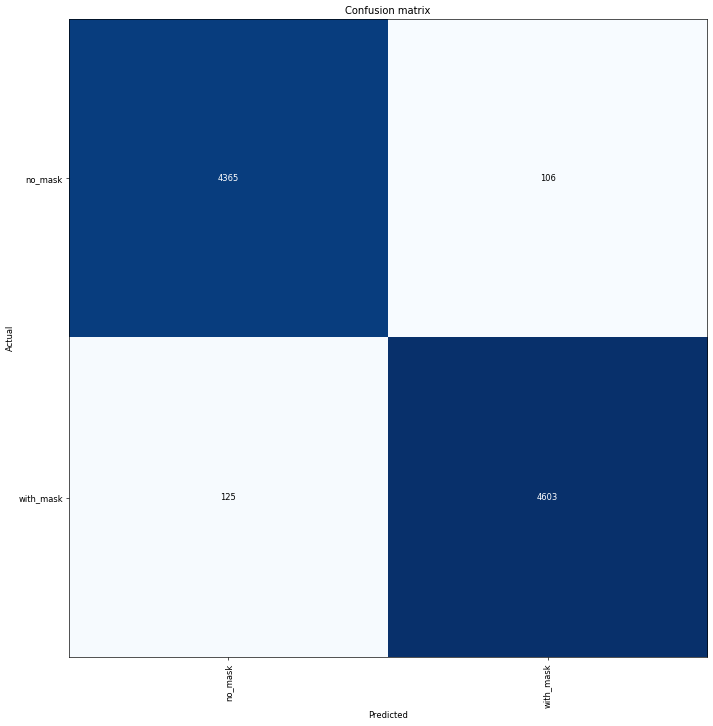

In [35]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

2nd

In [38]:
resnet_learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.070940,0.050728,0.019459,05:38


In [39]:
interp = ClassificationInterpretation.from_learner(resnet_learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

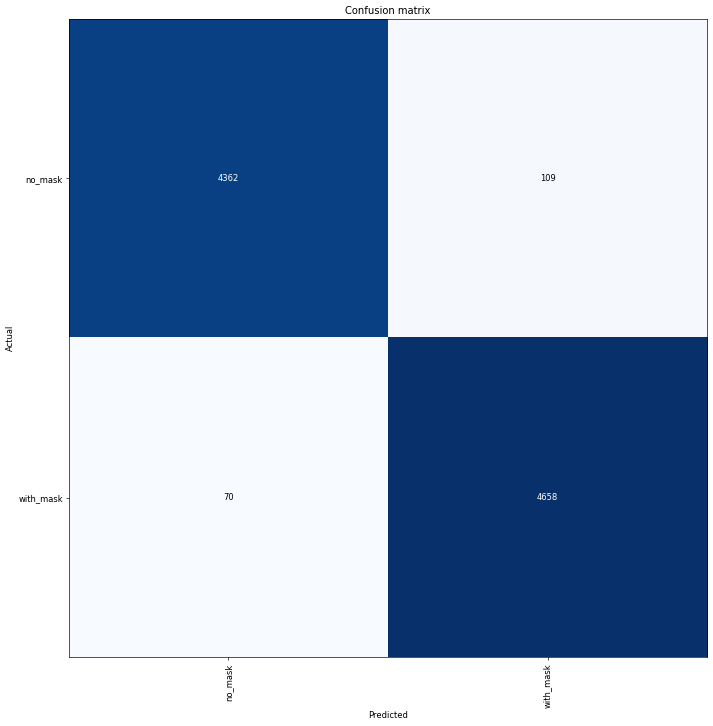

In [41]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

3rd

In [44]:
resnet_learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.062596,0.043459,0.015654,05:44


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f19f1f67668>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1203, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1177, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f19f1f67668>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1203, in __del__
    sel

In [45]:
interp = ClassificationInterpretation.from_learner(resnet_learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

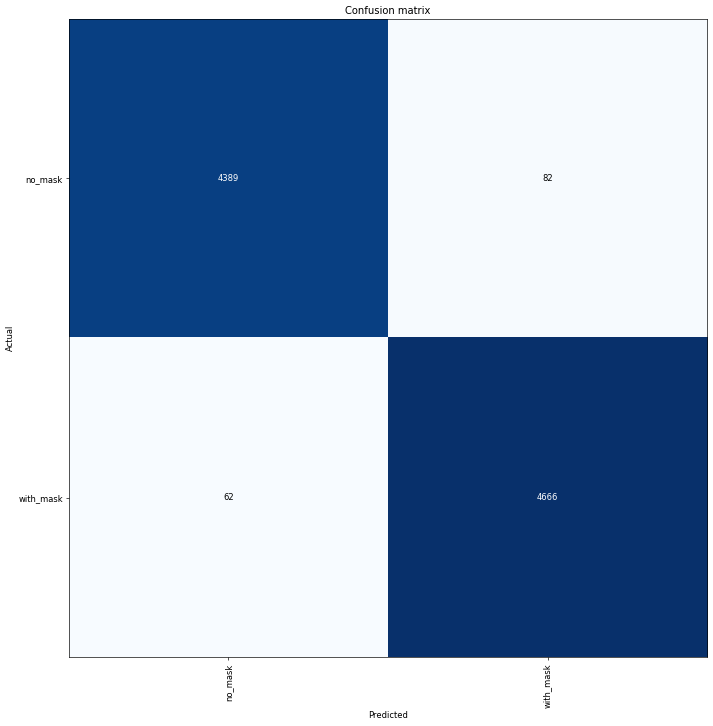

In [47]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

4th

In [50]:
resnet_learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.055580,0.042396,0.015871,05:44


In [51]:
interp = ClassificationInterpretation.from_learner(resnet_learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

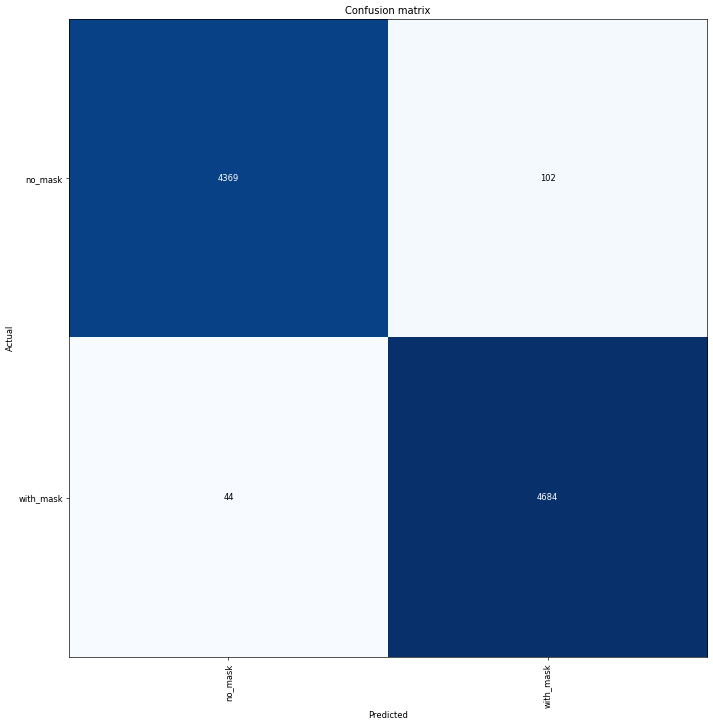

In [53]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

5th

In [56]:
resnet_learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.050272,0.038149,0.015110,05:46


In [57]:
interp = ClassificationInterpretation.from_learner(resnet_learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

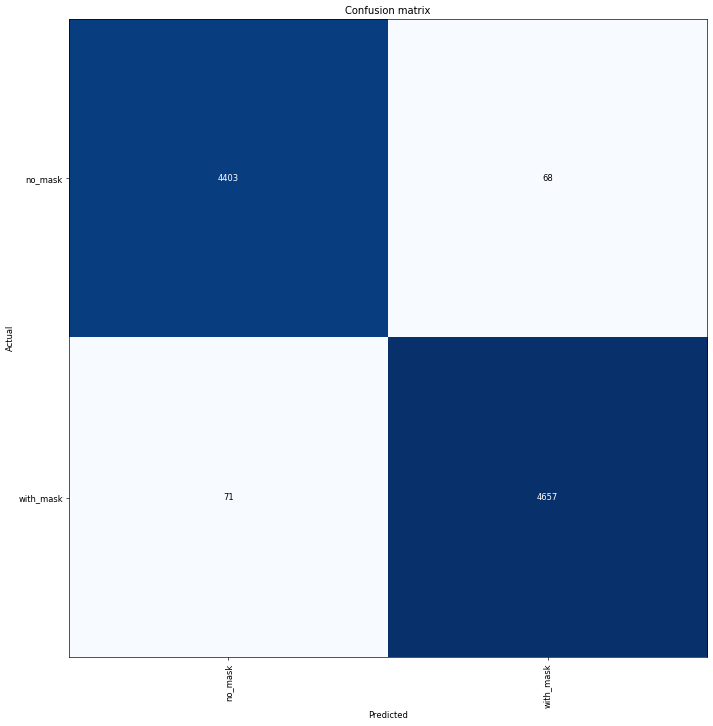

In [59]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

6th

In [62]:
resnet_learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.039223,0.037301,0.013045,05:50


In [63]:
interp = ClassificationInterpretation.from_learner(resnet_learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

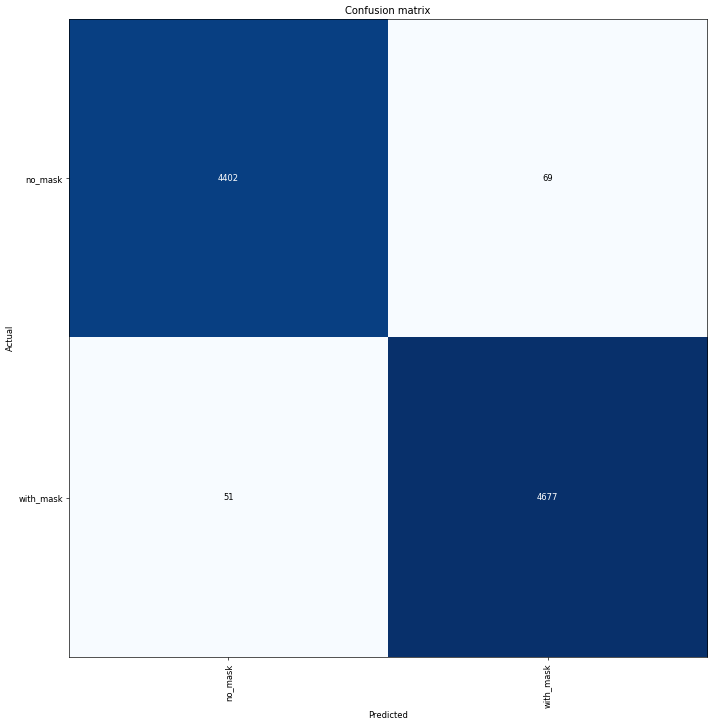

In [65]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)